# Setup of the environment



In [ ]:
import numpy as np
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt


Definizione di una funzione custom per mostrare i plot di accuracy e loss a confronto tra validation set e training set. 

In [ ]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

#Data preparation 

In [ ]:
num_classes = 10 #MNIST --> we have 10 digits 
input_shape = (28,28,1)

#load data 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#transform images in the range 0-1 --> scale images 
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

#images in 28 x 28 
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape, x_test.shape)

#convert label into categorical labels 
y_train = keras.utils.to_categorical(y_train, num_classes) #one-hot encoding 
yy_test = y_test
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_train[0:5])





(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


#Define the model


---
L'obiettivo era di ottenere un modello che con un numero massimo di 6000 parametri equiparasse le perfomance, del modello definito in aula. Per ottenere questo sono stati provati due approcci:


*   Diminuire il numero di neuroni, mantenedo max_pooling e kernel invariati
*   Mantenere un numero elevato di neuroni agendo su altri parametri (kernel size e max pooling)

Confrontando i risultati ottenuti sia in fase di training, che di test è stato scelto il primo approccio, in quando più performante, qui verrà riportato quello. Più avanti (in un'apposita sezione) verrà effettuato un confronto tra i due modelli. 



In [ ]:
from tensorflow.keras import regularizers

model = keras.Sequential(
    [
     keras.Input(shape = input_shape),
     layers.Conv2D(8, kernel_size = (3,3), activation = "relu"),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Conv2D(16, kernel_size = (3,3), activation = "relu"),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Flatten(), 
     layers.Dense(num_classes, activation = "softmax")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 10)                4

Come si può vedere dal summary il numero di parametri ottenuti è 5258. Si è deciso di ridurre il numero di neuroni in maniera proporzionale, quindi mantenendo il secondo layer convoluzionale di dimensione maggiore (doppie) rispetto al primo. I due layer convoluzionali presentano *relu* come funzione di attivazione. È stato mantenuto un layer fully-connected come ultimo layer con 10 possibili neuroni e *softmax* come funzione in quanto problema di classificazione non binario. La dimensione del kernel è stata settata a 3 x 3 per ognuno dei due layer convoluzionali e il la dimensione del max pooling è stata settata a 2x2. Infine è stato deciso di eliminare il dropout in quanto semplificando il modello non è necessario introdurre regolarizzazione altrimenti si rischia di incorrere nel problema dell'underfitting. 

#Training of the model 

La scelta degli hyperparametri per la fase di training è stata effettuata dopo varie prove con i valori che meglio aiutano per questo task. 
Per quanto riguarda la funzione di loss è stata scelta la *categorical crossentropy* in quanto è un problema di classificazione multi-label. La batch size scelta è stata 128, è stata provata anche 64 come dimensione, le performance non sembrano migliorare in maniera decisiva. Infine è stato provato sgd come ottimizzatore ma è stato osservato come necessiterebbe di più epoche per ottenere le performance ottenute con *adam*, è stato quindi deciso di optare per questo ottimizzatore. 

Epoch 1/15
422/422 [==============================] - 5s 7ms/step - loss: 0.4895 - accuracy: 0.8615 - val_loss: 0.1420 - val_accuracy: 0.9612
Epoch 2/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1389 - accuracy: 0.9584 - val_loss: 0.0940 - val_accuracy: 0.9733
Epoch 3/15
422/422 [==============================] - 3s 6ms/step - loss: 0.1030 - accuracy: 0.9694 - val_loss: 0.0941 - val_accuracy: 0.9738
Epoch 4/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0891 - accuracy: 0.9725 - val_loss: 0.0775 - val_accuracy: 0.9773
Epoch 5/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0780 - accuracy: 0.9759 - val_loss: 0.0792 - val_accuracy: 0.9780
Epoch 6/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0709 - accuracy: 0.9784 - val_loss: 0.0679 - val_accuracy: 0.9808
Epoch 7/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0645 - accuracy: 0.9808 - val_loss: 0.0632 - val_accuracy: 0.9833
Epoch 

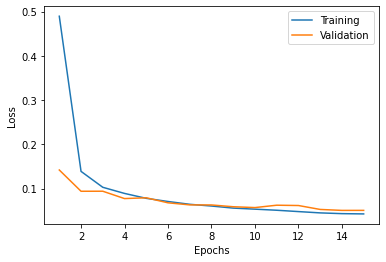

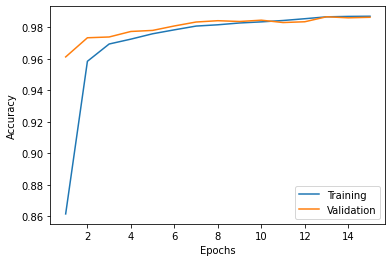

In [ ]:
epochs = 15
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split=(0.1))

x_plot = list(range(1,len(history.history["loss"])+1))
plot_history(history)


#Analysis of the performance of the training

Come si può vedere dalle due curve le prestazioni sul validation e sul training set sono equiparabili, segno che il modello non presenta nè overfitting, nè underfitting. Le prestazioni inoltre sono buone su entrambi i dataset in quanto l'accuratezza si assesta intorno al valore di 0.98. 

#Classification performance

Sono state calcolate le seguenti misure di performance (sia per il modello nel complesso, che per le singole classi):


*   Accuracy
*   Precision 

*   Recall 
*   F1 score

Come si può vedere le performance sono molto buone sia singolarmente per classe che per il modello nel complesso. Non c'è alcuna problematica particolare da segnalare. 





In [ ]:

predictions = model.predict(x_test) 
print('predictions shape:', predictions.shape)

y_classes = predictions.argmax(axis=-1)

from sklearn.metrics import classification_report
print(classification_report(y_classes, yy_test))

from sklearn.metrics import precision_score
precision = precision_score(y_classes, yy_test, average = 'macro')
print("Precision =", precision)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_classes, yy_test)
print("Accuracy =", accuracy)

from sklearn.metrics import recall_score
recall = recall_score(y_classes, yy_test, average = 'weighted')
print("Recall =", recall)

from sklearn.metrics import f1_score
f1 = f1_score(y_classes, yy_test, average = 'weighted')
print("F1 =", f1)

predictions shape: (10000, 10)
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       996
           1       0.99      0.99      0.99      1136
           2       0.98      0.98      0.98      1037
           3       0.99      0.98      0.99      1012
           4       0.99      0.98      0.99       992
           5       0.98      0.99      0.98       883
           6       0.98      0.99      0.99       948
           7       0.99      0.98      0.98      1029
           8       0.98      0.98      0.98       976
           9       0.98      0.99      0.98       991

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Precision = 0.985617101132731
Accuracy = 0.9858
Recall = 0.9858
F1 = 0.9858023052577389


# Comparison between different models





Come già anticipato seguendo questo secondo approccio è stato deciso di mantenere un numero di neuroni più elevato e agire sulla dimensione del *pooling*.

In [ ]:
from tensorflow.keras import regularizers

model = keras.Sequential(
    [
     keras.Input(shape = input_shape),
     layers.Conv2D(16, kernel_size = (3,3), activation = "relu"),
     layers.MaxPool2D(pool_size=(4,4)),
     layers.Conv2D(32, kernel_size = (3,3), activation = "relu"),
     layers.MaxPool2D(pool_size=(3,3)),
     layers.Flatten(), 
     layers.Dense(num_classes, activation = "softmax")
    ]
)

model.summary()



Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 1, 1, 32)         0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 10)              

Come si può vedere dal summary il numero di parametri ottenuti è 5130. Si è deciso di ridurre il numero di neuroni in maniera proporzionale, quindi mantenendo il secondo layer convoluzionale di dimensione maggiore (doppie) rispetto al primo. I due layer convoluzionali presentano *relu* come funzione di attivazione. È stato mantenuto un layer fully-connected come ultimo layer con 10 possibili neuroni e *softmax* come funzione di attivazione in quanto problema di classificazione non binario. La dimensione del kernel è stata settata a 3 x 3 per ognuno dei due layer convoluzionali e il la dimensione del max pooling è stata settata a 4x4 per il primo layer e 3x3 per il secondo layer (per ridurre il numero di parametri totali). Anche in questo problema è stato rimosso il dropout, in quanto il modello risulta già leggermente underfittato. 

#Training of the model 

La scelta degli hyperparametri per la fase di training è stata effettuato dopo varie prove con i valori che meglio aiutano per questo task. Per quanto riguarda la funzione di loss è stata scelta la *categorical crossentropy* in quanto è un problema di classificazione multi-label. La batch size scelta è stata 128, è stata provata anche 64 come dimensione, senza riscontrare grossi miglioramenti. Infine è stato provato sgd come ottimizzatore ma è stato osservato come necessiterebbe di più epoche per ottenere le performance ottenute con adam, è stato quindi deciso di optare per questo ottimizzatore. 

Epoch 1/15
422/422 [==============================] - 4s 7ms/step - loss: 0.9465 - accuracy: 0.7304 - val_loss: 0.2997 - val_accuracy: 0.9200
Epoch 2/15
422/422 [==============================] - 3s 6ms/step - loss: 0.2705 - accuracy: 0.9214 - val_loss: 0.1778 - val_accuracy: 0.9488
Epoch 3/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1951 - accuracy: 0.9416 - val_loss: 0.1366 - val_accuracy: 0.9617
Epoch 4/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1613 - accuracy: 0.9511 - val_loss: 0.1203 - val_accuracy: 0.9658
Epoch 5/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1405 - accuracy: 0.9574 - val_loss: 0.1039 - val_accuracy: 0.9698
Epoch 6/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1279 - accuracy: 0.9613 - val_loss: 0.0973 - val_accuracy: 0.9702
Epoch 7/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1165 - accuracy: 0.9641 - val_loss: 0.0850 - val_accuracy: 0.9757
Epoch 

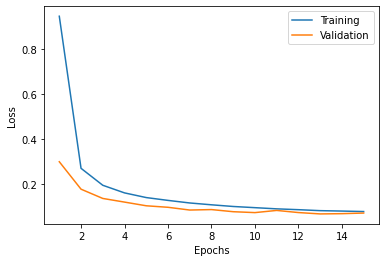

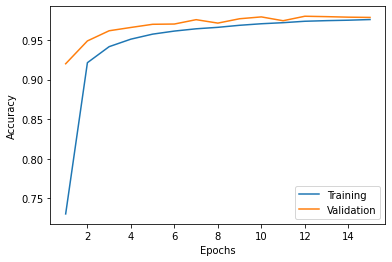

In [ ]:
epochs = 15
batch_size = 64

model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split=(0.1))

x_plot = list(range(1,len(history.history["loss"])+1))
plot_history(history)

#Analysis of the performance of the training

Come si può vedere dalle due curve le prestazioni sul validation e sul training set sono equiparabili, anche se quella del validation è leggermente sopra a quella del training. Le prestazioni comunque sono buone su entrambi i dataset in quanto l'accuratezza si assesta intorno al valore di 0.98. 

Classification performance

Sono state calcolate le seguenti misure di performance (sia per il modello nel complesso, che per le singole classi):

    

*   Accuracy
*   Precision
* Recall
* F1-score

Come si può vedere le performance sono molto buone sia singolarmente per classe che per il modello nel complesso. Non c'è alcuna problematica particolare da segnalare. Tuttavia risultano di poco inferiori a quelle ottenute dal modello presentato precedentemente. 

In [ ]:
predictions = model.predict(x_test) 
print('predictions shape:', predictions.shape)

y_classes = predictions.argmax(axis=-1)

from sklearn.metrics import classification_report
print(classification_report(y_classes, yy_test))

from sklearn.metrics import precision_score
precision = precision_score(y_classes, yy_test, average = 'macro')
print("Precision =", precision)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_classes, yy_test)
print("Accuracy =", accuracy)

from sklearn.metrics import recall_score
recall = recall_score(y_classes, yy_test, average = 'weighted')
print("Recall =", recall)

from sklearn.metrics import f1_score
f1 = f1_score(y_classes, yy_test, average = 'weighted')
print("F1 =", f1)

predictions shape: (10000, 10)
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       987
           1       0.99      1.00      0.99      1125
           2       0.95      0.98      0.96      1004
           3       0.98      0.96      0.97      1029
           4       0.98      0.98      0.98       986
           5       0.97      0.98      0.97       885
           6       0.99      0.98      0.98       961
           7       0.96      0.96      0.96      1034
           8       0.98      0.96      0.97       993
           9       0.96      0.98      0.97       996

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Precision = 0.9747712167656492
Accuracy = 0.9748
Recall = 0.9748
F1 = 0.974802779843156


#Conclusions

Sono stati confrontati due approcci per la costruzione di una rete convoluzionale che rispettasse il vincolo del numero massimo di parametri pari a 6000. Come è stato presentato l'approccio che prevede di diminuire il numero di neuroni per ogni layer, lasciando invariati il valore di pooling e kernel size è quello che risulta più performante sia per quanto riguarda per performance ottenute in fase di training che in fase di predizione. Tuttavia entrambi gli approcci ottengono prestazioni molto buone. 